# Домашнє завдання: Інтеграція Python та SQL: запити даних

Це ДЗ передбачене під виконання на локальній машині. Виконання з Google Colab буде суттєво ускладнене.

## Підготовка
1. Переконайтесь, що у вас встановлены необхідні бібліотеки:
   ```bash
   pip install sqlalchemy pymysql pandas matplotlib seaborn python-dotenv
   ```

2. Створіть файл `.env` з параметрами підключення до бази даних classicmodels. Базу даних ви можете отримати через

  - docker-контейнер згідно існтрукції в [документі](https://www.notion.so/hannapylieva/Docker-1eb94835849480c9b2e7f5dc22ee4df9), також відео інструкції присутні на платформі - уроки "MySQL бази, клієнт для роботи з БД, Docker і ChatGPT для запитів" та "Як встановити Docker для роботи з базами даних без терміналу"
  - або встановивши локально цю БД - для цього перегляньте урок "Опціонально. Встановлення MySQL та  БД Сlassicmodels локально".
  
  Приклад `.env` файлу ми створювали в лекції. Ось його обовʼязкове наповнення:
    ```
    DB_HOST=your_host
    DB_PORT=3306 або 3307 - той, який Ви налаштували
    DB_USER=your_username
    DB_PASSWORD=your_password
    DB_NAME=classicmodels
    ```
  Якщо ви створили цей файл під час перегляду лекції - **новий створювати не треба**. Замініть лише назву БД, або пропишіть назву в коді створення підключення (замість отримання назви цільової БД зі змінних оточення). Але переконайтесь, що до `.env` файл лежить в тій самій папці, що і цей ноутбук.

  **УВАГА!** НЕ копіюйте скрит для **створення** `.env` файлу. В лекції він наводиться для прикладу. І давалось пояснення, що в реальних проєктах ми НІКОЛИ не пишемо доступи до бази в коді. Копіювання скрипта для створення `.env` файлу сюди в ДЗ буде вважатись грубою помилкою і ми зніматимемо бали.

3. Налаштуйте підключення через SQLAlchemy до БД за прикладом в лекції.

Рекомендую вивести (відобразити) змінну engine після створення. Вона має бути не None! Якщо None - значить у Вас не підтягнулись налаштування з .env файла.

Ви також можете налаштувати параметри підключення до БД без .env файла, просто прописавши текстом в відповідних місцях. Це - не рекомендований підхід.

In [1]:
pip install sqlalchemy pymysql pandas matplotlib seaborn python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Завантаження змінних з .env
load_dotenv()

# Отримання значень
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")

# Формування рядка підключення
connection_str = f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(connection_str)

# Перевірка
print("✅ Підключення успішне!" if engine is not None else "❌ Помилка підключення.")


✅ Підключення успішне!


### Завдання 1: Простий запит

Ми працюємо з БД Classicmodels.

**Виведіть інформацію про продукти на складі** з наступними полями:
- назва продукту (productName)
- лінійка продукту (productLine)
- кількість на складі (quantityInStock)
- ціна закупки (buyPrice)

Зчитайте дані з БД з допомогою `pd.read_sql()` з SQLAlchemy engine, який ви створили на етапі підготовки.

Виведіть перші 10 продуктів, відсортованих за кількістю на складі (від більшої кількості до меншої).

In [12]:
import pandas as pd
from sqlalchemy import text

query = text("""
    SELECT 
        productName, 
        productLine, 
        quantityInStock, 
        buyPrice
    FROM 
        products
    ORDER BY 
        quantityInStock DESC
    LIMIT 10
""")

df = pd.read_sql(query, con=engine)
df

,productName,productLine,quantityInStock,buyPrice
0,2002 Suzuki XREO,Motorcycles,9997,66.27
1,1995 Honda Civic,Classic Cars,9772,93.89
2,America West Airlines B757-200,Planes,9653,68.80
3,2002 Chevy Corvette,Classic Cars,9446,62.11
4,1932 Model A Ford J-Coupe,Vintage Cars,9354,58.48
5,1982 Ducati 996 R,Motorcycles,9241,24.14
6,1912 Ford Model T Delivery Wagon,Vintage Cars,9173,46.91
7,1976 Ford Gran Torino,Classic Cars,9127,73.49
8,1968 Dodge Charger,Classic Cars,9123,75.16
9,1965 Aston Martin DB5,Classic Cars,9042,65.96



### Завдання 2: Аналітика замовлень за 2004 рік (3 бали)

**Виведіть детальну інформацію про замовлення за 2004 рік** з наступними полями:
- Номер замовлення (orderNumber)
- Дата замовлення (orderDate)
- Статус замовлення (status)
- Ім'я клієнта (customerName)
- Країна клієнта (country)
- Загальна сума замовлення (сума всіх orderdetails.quantityOrdered * orderdetails.priceEach)

Використайте JOIN для об'єднання таблиць orders, customers, orderdetails. Додайте параметризацію за роком (тільки замовлення за 2004 рік).

Використайте `text()` та named parameters для формування запиту з SQLAlchemy.

Після отримання даних з БД проведіть обчислення з Python та напишіть висновки:
1. Побудуйте стовпчасту діаграму суми замовлень по країнам і напишіть, в якій країні найбільша сума замовлень за 2004 рік.
2. В країні з найбільшою кількістю замовлень знайдіть клієнта, який зробив замовлень на найбільшу суму і виведіть імʼя цього клієнта, на яку суму він зробив замовлень і який % від всіх замовлень в цій країні становить його сума замовлень за рік.

In [28]:
from sqlalchemy import text
import pandas as pd

query = text("""
SELECT
    o.orderNumber,
    o.orderDate,
    o.status,
    c.customerName,
    c.country,
    SUM(od.quantityOrdered * od.priceEach) AS totalAmount
FROM orders o
JOIN customers c ON o.customerNumber = c.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
WHERE YEAR(o.orderDate) = :target_year
GROUP BY o.orderNumber, o.orderDate, o.status, c.customerName, c.country
ORDER BY totalAmount DESC
""")

# Виконуємо запит з параметром target_year = 2004
df = pd.read_sql(query, con=engine, params={"target_year": 2004})

df

,orderNumber,orderDate,status,customerName,country,totalAmount
0,10287,2004-08-30,Shipped,"Vida Sport, Ltd",Switzerland,61402.00
1,10310,2004-10-16,Shipped,"Toms Spezialitäten, Ltd",Germany,61234.67
2,10212,2004-01-16,Shipped,Euro+ Shopping Channel,Spain,59830.55
3,10222,2004-02-19,Shipped,Collectable Mini Designs Co.,USA,56822.65
4,10312,2004-10-21,Shipped,Mini Gifts Distributors Ltd.,USA,55639.66
...,...,...,...,...,...,...
146,10277,2004-08-04,Shipped,"Dragon Souveniers, Ltd.",Singapore,2611.84
147,10317,2004-11-02,Shipped,Technics Stores Inc.,USA,2434.25
148,10286,2004-08-28,Shipped,"La Corne D'abondance, Co.",France,1960.80
149,10242,2004-04-20,Shipped,Microscale Inc.,USA,1679.92


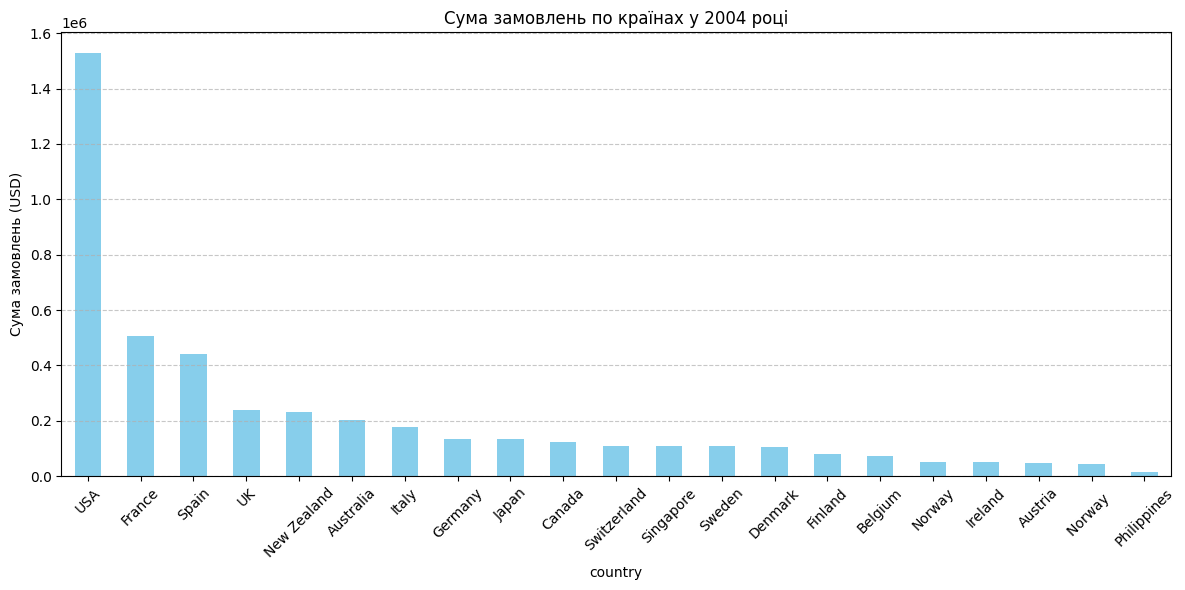

Найбільша сума замовлень у 2004 році — USA: 1526499.65 USD


In [29]:
import matplotlib.pyplot as plt

country_sales = df.groupby("country")["totalAmount"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_sales.plot(kind="bar", color="skyblue")
plt.title("Сума замовлень по країнах у 2004 році")
plt.ylabel("Сума замовлень (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Виводимо країну з найбільшою сумою замовлень
top_country = country_sales.idxmax()
top_country_total = country_sales.max()

print(f"Найбільша сума замовлень у 2004 році — {top_country}: {top_country_total:.2f} USD")


In [35]:
# Фільтруємо тільки замовлення з топ-країни
df_top_country = df[df["country"] == top_country]

# Групуємо по клієнтах у цій країні
client_sales = df_top_country.groupby("customerName")["totalAmount"].sum().sort_values(ascending=False)

top_client = client_sales.idxmax()
top_client_total = client_sales.max()
share_percent = (top_client_total / top_country_total) * 100

print(f"Найбільше замовлень у {top_country} зробив клієнт: {top_client}")
print(f"Сума замовлень: {top_client_total:.2f} USD")
print(f"Частка від усіх замовлень в {top_country}: {share_percent:.2f}%")


Найбільше замовлень у USA зробив клієнт: Mini Gifts Distributors Ltd.
Сума замовлень: 231562.53 USD
Частка від усіх замовлень в USA: 15.17%



### Завдання 3: Аналітичний запит - Топ продуктів по продажах (6 балів)

В цьому завданні ви отримуєте 1 бал за правильний SQL запит і по 1 балу за кожне завдання з Python.

**Проведіть аналіз прибутковості продуктів** та для цього дістаньте з БД інформацію з наступними полями:
- Назва продукту
- Лінійка продукту (productLine)
- Загальний дохід з цього продукту (сума quantity * priceEach)
- Ранг продукту по доходу (тобто яке місце посідає цей продукт за доходом серед усіх продуктів в нашому магазині)
- Який відсоток від загального доходу компанії складає цей продукт
- Різниця з середнім доходом по лінійці продукту (в %)

Відсортуйте дані за спаданням значень колонки "Який відсоток від загального доходу компанії складає цей продукт".

При створенні SQL запиту вам можуть стати в нагоді:
- **CTE** для розрахунку доходу по кожному продукту
- **Віконні функції** для ранжування та порівняння з середнім

Після отримання даних з БД проведіть обчислення (де треба) з Python та напишіть висновки:
1. Який відсоток від загального доходу складає ТОП1 продукт і що це за продукт?
2. Створіть стовпчикову діаграму топ-10 продуктів по доходу. В скільки разів відрізняється сумарний дохід за ТОП1 продуктом від 10го продукту за сумою доходу?
3. Створіть кругову діаграму розподілу доходу по лініях продуктів. Який відсоток від всіх продажів становлять продажі за ТОП2 лініями сумарно?
4. Розрахуйте та виведіть за принципом Парето (80/20) - скільки продуктів дають 80% доходу. Тобто нам треба знайти кількість продуктів сумарне значення "відсотку від загального доходу компанії", яких складає 80 починаючи з продукту з найбільшим цим відсотком.
5. Зробіть ще будь-яке аналітичне дослідження, яке дасть нам більше розуміння наших даних, що ми дістали в БД в цьому завданні. Сформоване питання до даних і обчислення має бути обовʼязково. Візуалізація - опціонально.

Візуалізацію можна створювати з будь-якою бібліотекою на ваш вибір.

In [38]:
from sqlalchemy import text

query = text("""
WITH product_revenue AS (
    SELECT 
        p.productName,
        p.productLine,
        SUM(od.quantityOrdered * od.priceEach) AS total_revenue
    FROM products p
    JOIN orderdetails od ON p.productCode = od.productCode
    GROUP BY p.productCode
),
revenue_with_window AS (
    SELECT 
        *,
        RANK() OVER (ORDER BY total_revenue DESC) AS revenue_rank,
        SUM(total_revenue) OVER () AS company_total_revenue,
        ROUND(100.0 * total_revenue / SUM(total_revenue) OVER (), 2) AS revenue_percent,
        AVG(total_revenue) OVER (PARTITION BY productLine) AS avg_line_revenue
    FROM product_revenue
)
SELECT 
    productName,
    productLine,
    total_revenue,
    revenue_rank,
    revenue_percent,
    ROUND(100.0 * (total_revenue - avg_line_revenue) / avg_line_revenue, 2) AS diff_from_line_avg_percent
FROM revenue_with_window
ORDER BY revenue_percent DESC;
""")

df_profitability = pd.read_sql(query, con=engine)

df_profitability



,productName,productLine,total_revenue,revenue_rank,revenue_percent,diff_from_line_avg_percent
0,1992 Ferrari 360 Spider red,Classic Cars,276839.98,1,2.88,165.78
1,2001 Ferrari Enzo,Classic Cars,190755.86,2,1.99,83.14
2,1952 Alpine Renault 1300,Classic Cars,190017.96,3,1.98,82.43
3,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,170686.00,4,1.78,97.87
4,1968 Ford Mustang,Classic Cars,161531.48,5,1.68,55.08
...,...,...,...,...,...,...
104,1982 Ducati 996 R,Motorcycles,33268.76,105,0.35,-61.43
105,1958 Chevy Corvette Limited Edition,Classic Cars,31627.96,106,0.33,-69.64
106,1982 Lamborghini Diablo,Classic Cars,30972.87,107,0.32,-70.26
107,1936 Mercedes Benz 500k Roadster,Vintage Cars,29763.39,108,0.31,-60.26


In [39]:
top1 = df_profitability.iloc[0]
print(f"ТОП-1 продукт: {top1['productName']}")
print(f"Він складає {top1['revenue_percent']}% від загального доходу компанії.")


ТОП-1 продукт: 1992 Ferrari 360 Spider red
Він складає 2.88% від загального доходу компанії.


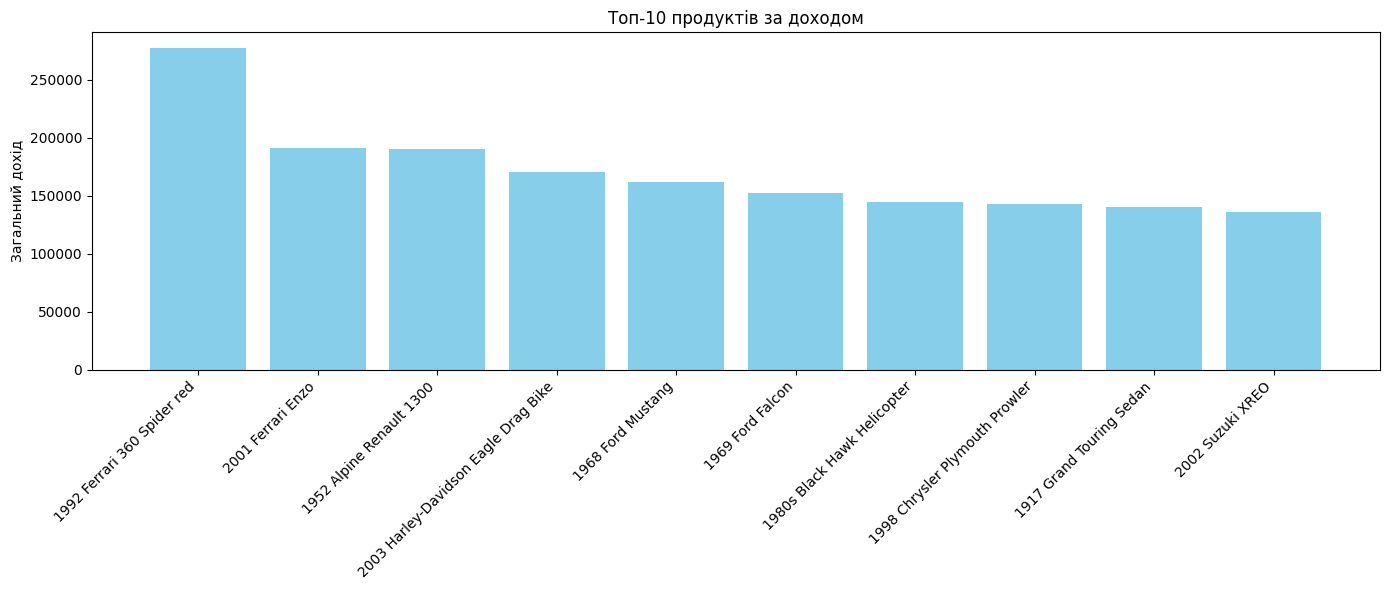

ТОП-1 продукт має в 2.04 раз(и) більший дохід, ніж 10-й.


In [40]:
top10 = df_profitability.head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.bar(top10["productName"], top10["total_revenue"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Топ-10 продуктів за доходом")
plt.ylabel("Загальний дохід")
plt.tight_layout()
plt.show()

# У скільки разів
diff_ratio = round(top10.iloc[0]["total_revenue"] / top10.iloc[-1]["total_revenue"], 2)
print(f"ТОП-1 продукт має в {diff_ratio} раз(и) більший дохід, ніж 10-й.")


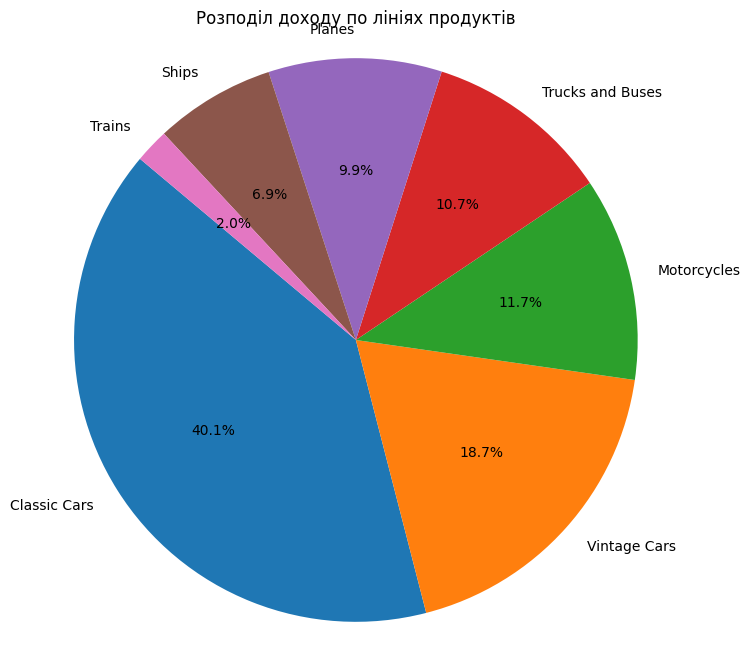

ТОП-2 лінії продуктів дають 58.84% від загального доходу.


In [41]:
line_revenue = df_profitability.groupby("productLine")["total_revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(line_revenue, labels=line_revenue.index, autopct="%1.1f%%", startangle=140)
plt.title("Розподіл доходу по лініях продуктів")
plt.axis("equal")
plt.show()

# Частка ТОП-2
top2_share = round(100 * line_revenue.head(2).sum() / line_revenue.sum(), 2)
print(f"ТОП-2 лінії продуктів дають {top2_share}% від загального доходу.")

In [42]:
df_sorted = df_profitability.sort_values(by="revenue_percent", ascending=False).reset_index(drop=True)
df_sorted["cum_percent"] = df_sorted["revenue_percent"].cumsum()
num_top_products = (df_sorted["cum_percent"] <= 80).sum()

print(f"{num_top_products} продуктів дають 80% доходу компанії.")

71 продуктів дають 80% доходу компанії.


In [43]:
avg_by_line = df_profitability.groupby("productLine")["total_revenue"].mean().sort_values(ascending=False)

print("Найвищий середній дохід на 1 продукт:")
print(avg_by_line.head(1))

print("\nНайнижчий середній дохід на 1 продукт:")
print(avg_by_line.tail(1))

Найвищий середній дохід на 1 продукт:
productLine
Classic Cars    104160.067297
Name: total_revenue, dtype: float64

Найнижчий середній дохід на 1 продукт:
productLine
Trains    62844.306667
Name: total_revenue, dtype: float64


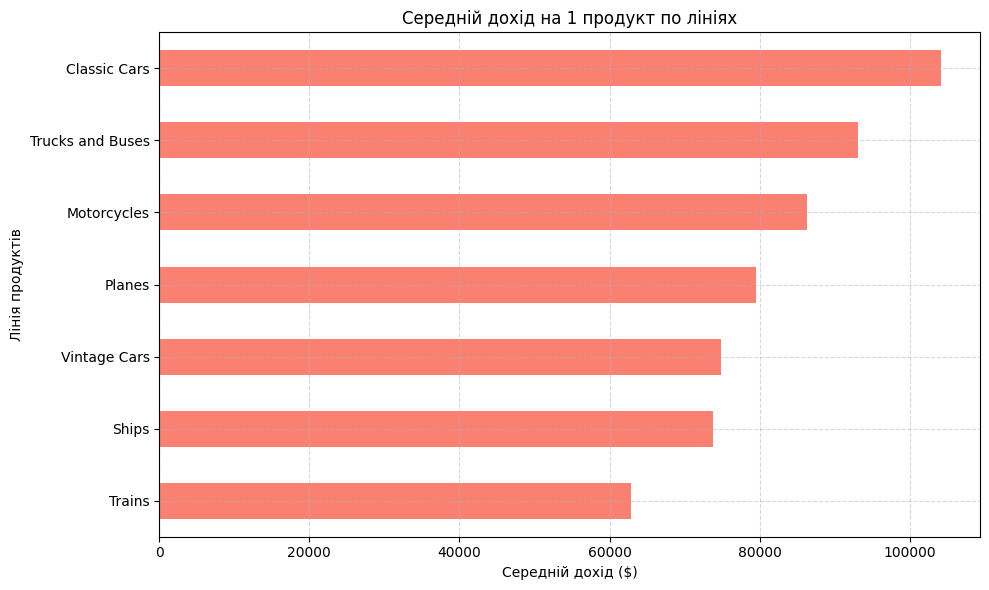

In [44]:
import matplotlib.pyplot as plt

avg_by_line.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title('Середній дохід на 1 продукт по лініях')
plt.xlabel('Середній дохід ($)')
plt.ylabel('Лінія продуктів')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Яка лінія продуктів є найприбутковішою в середньому на одиницю товару?
Найприбутковіша лінійка продуктів — це Classic Cars, яка значно випереджає інші категорії по середньому доходу з одного продукту.
Найменш прибуткова — Trains, із найнижчим середнім доходом серед усіх лінійок.
Інші лінійки, як Ships, Planes, Vintage Cars — показують схожий рівень доходу, але помітно поступаються лідеру.


### ОПЦІОНАЛЬНО. Завдання 4: Аналітичний запит - Динаміка продажів по місяцях (8 балів)

**Проведіть аналіз динаміки продажів по місяцях** та для цього дістаньте з бази інформацію з наступними полями:
- Рік та місяць замовлень
- Кількість замовлень за цей рік-місяць
- Загальний дохід (quantityOrdered * priceEach) за цей рік-місяць
- На який % ми зросли за доходом порівняно з попереднім місяцем
- Накопичувальний дохід до цього місяця за рік
- Ковзне середнє доходу за 3 місяці
- Ранг цього місяця за доходом

Використайте:
- **CTE** для агрегації продажів по місяцях
- **Віконні функції** для розрахунку:
  - Зростання доходу порівняно з попереднім місяцем (LAG)
  - Накопичувальний дохід за рік
  - Ковзне середнє доходу за 3 місяці (AVG OVER)
  - Ранжування місяців за доходом (RANK)

Після отримання даних з БД побудуйте наступні графіки і напишіть коротко, які висновки з них можна зробити.
1. Створіть лінійний графік доходу по місяцях. Чи є тред до зростання в даних?
2. Створіть графік місяць-до-місяця зростання у відсотках.
3. Створіть heatmap сезонності (місяць vs рік)
4. Відобразіть козвне середнє разом з динамікою продажів.
5. Розрахуйте кореляцію між кількістю замовлень та середнім чеком та побудуйте графік розсіювання між цими змінними. Чи є лінійна залежність?

Очікуваний результат кожного графіку - нижче.
В першому графіку я додала лінію тренду аби показати тренд. Вам її додавати не треба.


In [48]:
query = """
WITH monthly_sales AS (
    SELECT
        YEAR(o.orderDate) AS order_year,
        MONTH(o.orderDate) AS order_month,
        COUNT(DISTINCT o.orderNumber) AS order_count,
        SUM(od.quantityOrdered * od.priceEach) AS total_revenue
    FROM orders o
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
    GROUP BY YEAR(o.orderDate), MONTH(o.orderDate)
),
enhanced_sales AS (
    SELECT
        *,
        LAG(total_revenue) OVER (ORDER BY order_year, order_month) AS prev_month_revenue,
        SUM(total_revenue) OVER (PARTITION BY order_year ORDER BY order_month) AS cumulative_revenue,
        AVG(total_revenue) OVER (ORDER BY order_year, order_month ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_avg_3_months,
        RANK() OVER (ORDER BY total_revenue DESC) AS revenue_rank
    FROM monthly_sales
)
SELECT
    order_year,
    order_month,
    order_count,
    total_revenue,
    ROUND(
        100.0 * (total_revenue - prev_month_revenue) / NULLIF(prev_month_revenue, 0),
        2
    ) AS revenue_growth_percent,
    cumulative_revenue,
    ROUND(moving_avg_3_months, 2) AS moving_avg_3_months,
    revenue_rank
FROM enhanced_sales
ORDER BY order_year, order_month;
"""

df_monthly_sales = pd.read_sql(query, con=engine)
df_monthly_sales.head(10)  


,order_year,order_month,order_count,total_revenue,revenue_growth_percent,cumulative_revenue,moving_avg_3_months,revenue_rank
0,2003,1,5,116692.77,NaN,116692.77,116692.77,29
1,2003,2,3,128403.64,10.04,245096.41,122548.21,28
2,2003,3,6,160517.14,25.01,405613.55,135204.52,26
3,2003,4,7,185848.59,15.78,591462.14,158256.46,23
4,2003,5,6,179435.55,-3.45,770897.69,175267.09,24
5,2003,6,7,150470.77,-16.14,921368.46,171918.30,27
6,2003,7,7,201940.36,34.21,1123308.82,177282.23,21
7,2003,8,5,178257.11,-11.73,1301565.93,176889.41,25
8,2003,9,8,236697.85,32.78,1538263.78,205631.77,19
9,2003,10,18,514336.21,117.30,2052599.99,309763.72,3


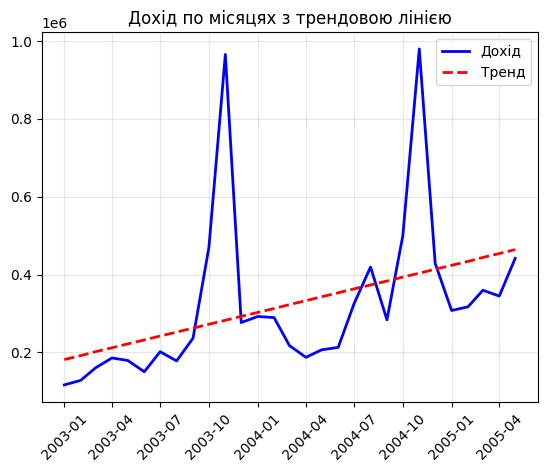

In [ ]:
# 1. Лінійний графік доходу з трендом (аби показати, що тренд є)


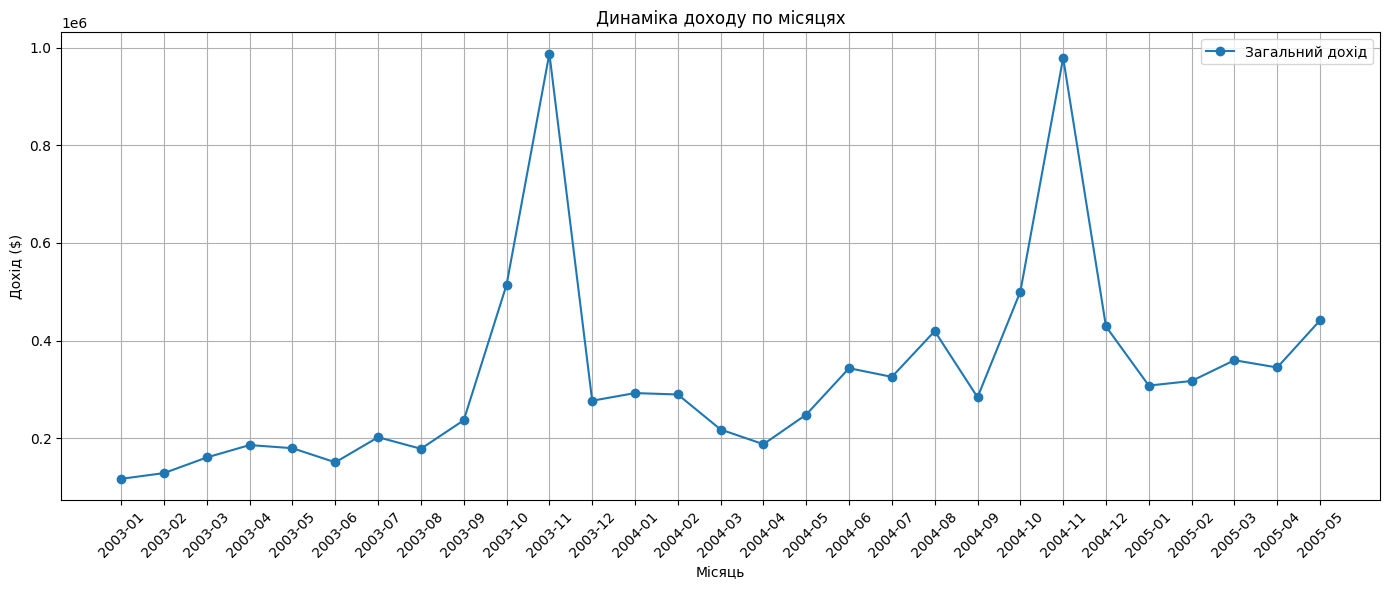

In [49]:
import matplotlib.pyplot as plt

df_monthly_sales["year_month"] = df_monthly_sales["order_year"].astype(str) + "-" + df_monthly_sales["order_month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))
plt.plot(df_monthly_sales["year_month"], df_monthly_sales["total_revenue"], marker='o', label='Загальний дохід')
plt.xticks(rotation=45)
plt.title("Динаміка доходу по місяцях")
plt.xlabel("Місяць")
plt.ylabel("Дохід ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Ні, стійкого висхідного тренду немає. Є повторюваний сезонний шаблон, але довгострокового зростання по місяцях не видно.

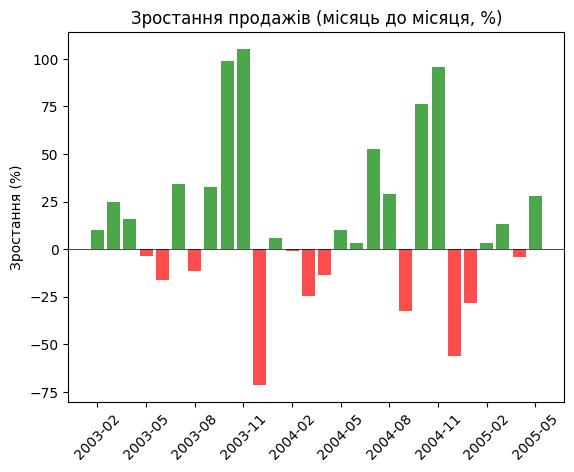

In [ ]:
# 2. Місяць-до-місяця зростання


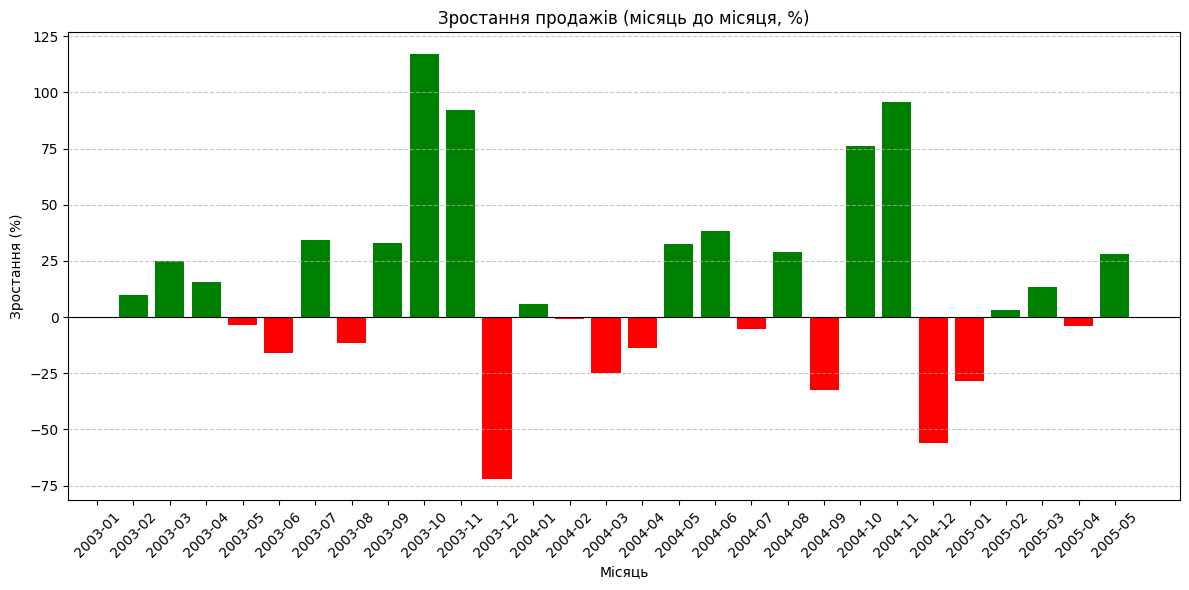

In [51]:
import matplotlib.pyplot as plt

# Створимо мітки типу 'YYYY-MM'
df_monthly_sales['year_month'] = df_monthly_sales['order_year'].astype(str) + '-' + df_monthly_sales['order_month'].astype(str).str.zfill(2)

x = df_monthly_sales['year_month']
y = df_monthly_sales['revenue_growth_percent']

# Кольори: зелений для зростання, червоний для падіння
colors = ['green' if val > 0 else 'red' for val in y.fillna(0)]

plt.figure(figsize=(12, 6))
plt.bar(x, y, color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Зростання продажів (місяць до місяця, %)')
plt.xlabel('Місяць')
plt.ylabel('Зростання (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

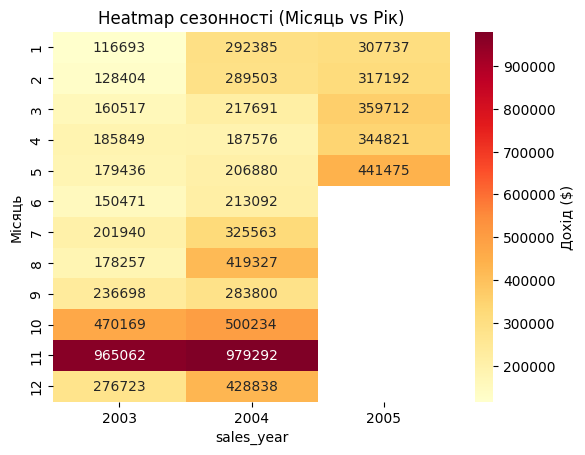

In [ ]:
# 3. Heatmap сезонності


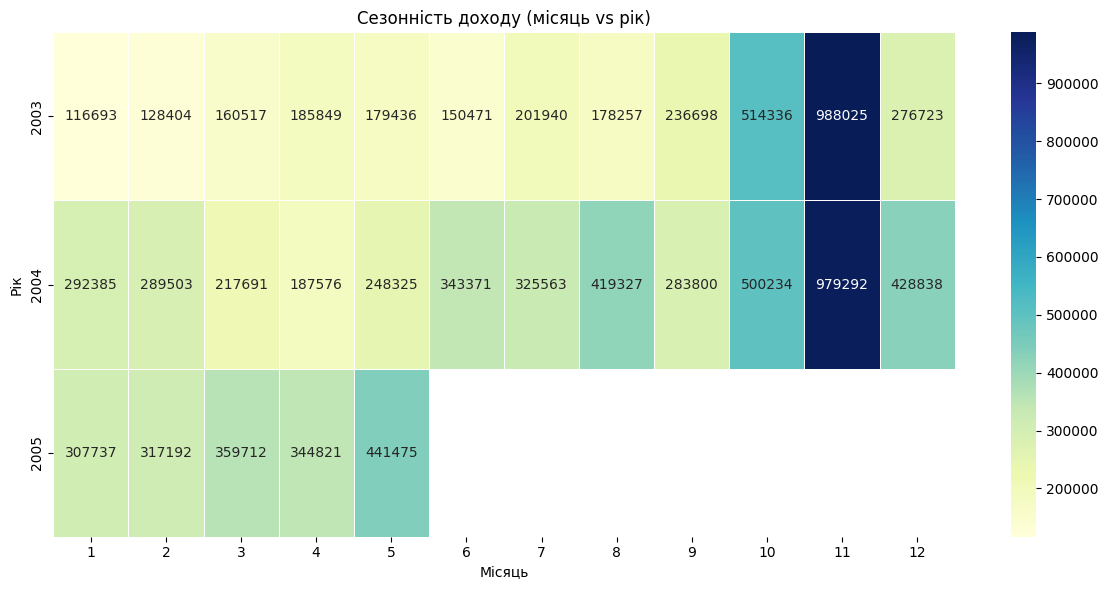

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

df_monthly_sales['order_month'] = df_monthly_sales['order_month'].astype(int)

# Створення таблиці для heatmap: рядки — рік, стовпці — місяць
pivot_table = df_monthly_sales.pivot(index='order_year', columns='order_month', values='total_revenue')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)

plt.title('Сезонність доходу (місяць vs рік)')
plt.xlabel('Місяць')
plt.ylabel('Рік')
plt.tight_layout()
plt.show()


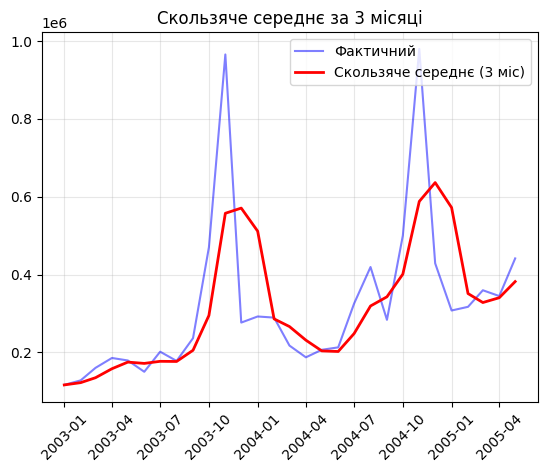

In [ ]:
# 4. Ковзне середнє з динімікою доходу


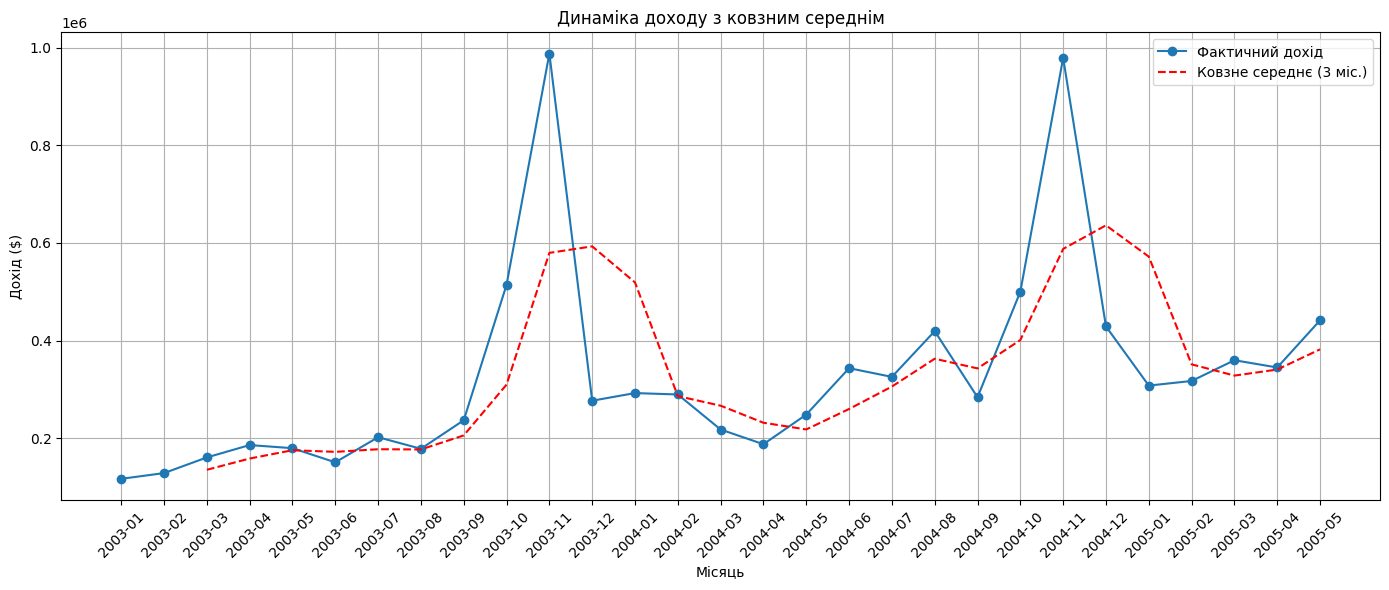

In [53]:
import matplotlib.pyplot as plt

# Створення стовпця з ковзним середнім (за 3 місяці)
df_monthly_sales['moving_avg_3_months'] = df_monthly_sales['total_revenue'].rolling(window=3).mean()

# Формат дати для осі X
df_monthly_sales['year_month'] = df_monthly_sales['order_year'].astype(str) + '-' + df_monthly_sales['order_month'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))

plt.plot(df_monthly_sales['year_month'], df_monthly_sales['total_revenue'], label='Фактичний дохід', marker='o')

# Ковзне середнє
plt.plot(df_monthly_sales['year_month'], df_monthly_sales['moving_avg_3_months'], label='Ковзне середнє (3 міс.)', color='red', linestyle='--')

plt.title('Динаміка доходу з ковзним середнім')
plt.xlabel('Місяць')
plt.ylabel('Дохід ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


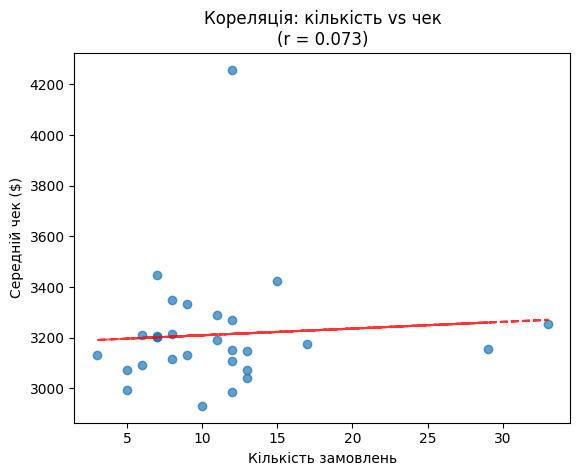

In [ ]:
# 5. Кореляція замовлень та середнього чеку


In [54]:
# Додати стовпець середнього чека
df_monthly_sales['avg_check'] = df_monthly_sales['total_revenue'] / df_monthly_sales['order_count']

# Розрахунок кореляції Пірсона
correlation = df_monthly_sales['order_count'].corr(df_monthly_sales['avg_check'])

print(f"Коефіцієнт кореляції: {correlation:.3f}")


Коефіцієнт кореляції: 0.017


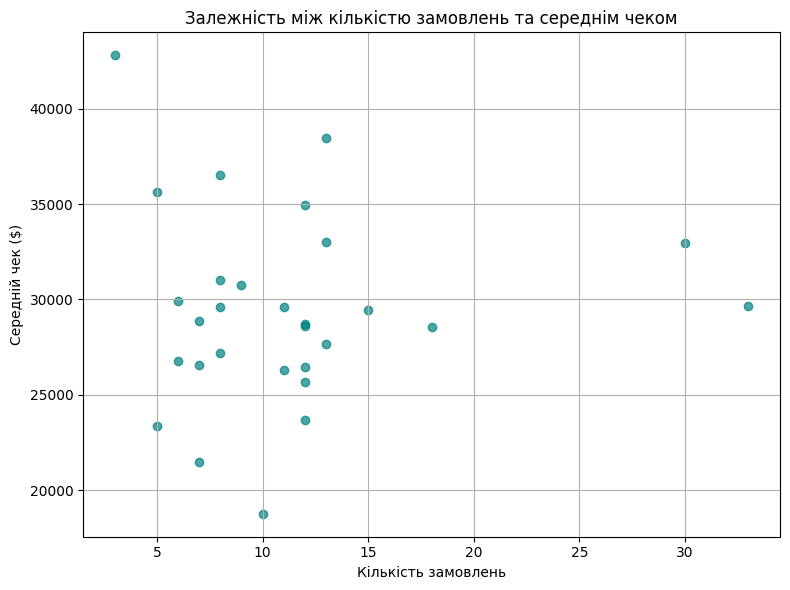

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_monthly_sales['order_count'], df_monthly_sales['avg_check'], color='teal', alpha=0.7)
plt.title('Залежність між кількістю замовлень та середнім чеком')
plt.xlabel('Кількість замовлень')
plt.ylabel('Середній чек ($)')
plt.grid(True)
plt.tight_layout()
plt.show()
